## Concentrated external load
\begin{gather}
    p_r(\phi, s) = \begin{cases}
    p_{max} \sqrt{1 - \frac{\phi^2}{\phi_0^2} - \frac{s^2}{s_0^2}} & \frac{\phi^2}{\phi_0^2} + \frac{s^2}{s_0^2} \leq 1 \\
    0 & \text{Otherwise}
    \end{cases}
\end{gather}
where $s$ is the curve length coordinate along the surface. $s=0$ at the middle of the surface, namely $s^2 = (r-r_m)^2 + (z-z_m)^2$, where $(r_m, z_m)$ is the location of the middle point. 
Let $D = \{(\phi, s):  \frac{\phi^2}{\phi_0^2} + \frac{s^2}{s_0^2} \leq 1 \}$
To ensure a constant area under the function, we require
\begin{gather}
    1 = \int_D p_r d\phi ds = p_{max} \int_D  \sqrt{1 - \frac{\phi^2}{\phi_0^2} - \frac{s^2}{s_0^2}} d\phi ds \\
    = p_{max} \phi_0 s_0 \int_{\phi^2 + s^2 \leq 1} \sqrt{1-\phi^2 - s^2} d\phi ds
    = \frac{2}{3} p_{max} \phi_0 s_0 \pi \\
    \Rightarrow p_{max} = \frac{3}{2\pi \phi_0 s_0}
\end{gather}
Fourier expansion:
\begin{gather}
    p_r(\phi, s) = \sum_{n=-\infty}^{\infty} p_r^{(n)}(s) e^{in\phi}
\end{gather}
Utilizing
\begin{gather}
    \int_{-1}^{1} \sqrt{1-x^2} e^{-ikx} dx = \frac{\pi J_1(k)}{k}
\end{gather}
we get
\begin{gather}
    p_r^{(n)} = \frac{1}{2\pi} \int_{-\pi}^{\pi} p_r(\phi) e^{-in\phi} d\phi
    = \frac{3\alpha J_1(\phi_0 \alpha n)}{4 \pi \phi_0 s_0 n}
\end{gather}
where
\begin{gather}
    \alpha = \sqrt{1-\frac{s^2}{s_0^2}}
\end{gather}
For $n=0$, we have
\begin{gather}
    p_r^{(0)} = \lim_{n \to 0} p_r^{(n)} = \frac{3\alpha^2}{8 s_0 \pi}
\end{gather}




In [78]:
import numpy as np
from numpy import pi, cos, sin, log, sqrt, exp
import matplotlib.pyplot as plt
import pandas as pd

from scipy.special import jv

# Reloading the module
import importlib

import Solid
importlib.reload(Solid)
from Solid import Solid

import Visualization
importlib.reload(Visualization)

import Utility
importlib.reload(Utility)

<module 'Utility' from 'C:\\Users\\bai_f\\Documents\\Timken\\research\\spectral2\\SEM2D_SingleSolid\\Utility.py'>

## Generating elements

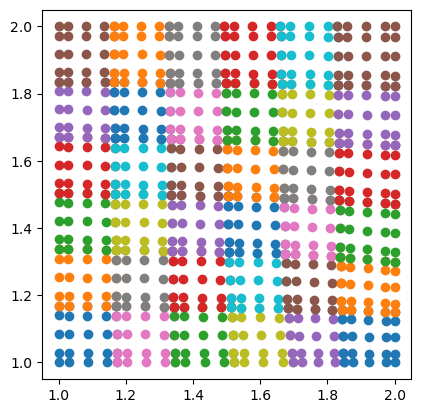

In [79]:
solid = Solid('Quad2')
solid.set_Element(grid_sizes = (4,4))
solid.set_ElasticProperty(E=1, nu=0.3)

## Solution of all Fourier modes

In [80]:
# Maximum absolute Fourier mode
solid.set_FourierMode(nmax=50)
solid.set_AngularGrid(Nphi=20)
solid.init_Arrays(exact=False)
solid.init_LinearSystem()

npart 0
Equation 0
Equation 1
Equation 2
npart 1
Equation 0
Equation 1
Equation 2
npart 2
Equation 0
Equation 1
Equation 2


In [81]:
# Transformed displacement, body force, external load
# Initialization
u_Fourier= np.empty(3, dtype=object)
f_Fourier = np.empty(3, dtype=object)
p_Fourier = np.empty(3, dtype=object)

u_Fourier[0] = lambda r, z, n:  0*r
u_Fourier[1] = lambda r, z, n:  0*r
u_Fourier[2] = lambda r, z, n:  0*r
f_Fourier[0] = lambda r, z, n, G, lamb:  0*r
f_Fourier[1] = lambda r, z, n, G, lamb:  0*r
f_Fourier[2] = lambda r, z, n, G, lamb:  0*r

p_Fourier[1] = lambda r, z, n, nr, nz, G, lamb:  0*r
p_Fourier[2] = lambda r, z, n, nr, nz, G, lamb:  0*r



In [82]:
# Computation for all Fourier modes
# p_Fourier[0] is defined for each Fourier mode n

# Parameters of the elliptical contact range
phi0 = np.pi/4
s0 = 0.4
# Mid point of the outer surface
rm = 2
zm = 1.5

for n in range(-solid.nmax, solid.nmax + 1):

    print(f"Fourier mode {n}")
    
    # Define pr
    def func_pr_Fourier(r, z, n, nr, nz, G, lamb):
        
        s = np.sqrt((r-rm)**2 + (z-zm)**2)
        if s>=s0:
            magnitude = 0
        else:
            alpha = np.sqrt(1-(s/s0)**2)
            if n == 0:
                magnitude = 3 * alpha**2 / (8 * s0 * np.pi)
            else:
                magnitude = 3 * alpha * jv(1, phi0 * alpha * n) / (4 * np.pi * phi0 * s0 * n)

        if np.isscalar(r):
            return -magnitude
        else:
            return -np.ones_like(r) * magnitude   
    
    p_Fourier[0] = func_pr_Fourier

    solid.init_SingleFourierMode(n, f_Fourier, p_Fourier)
    solid.solve_LinearSystem_SingleFourierMode(n, u_Fourier)



Fourier mode -50
residue 4.336808689942018e-19
Fourier mode -49
residue 5.421010862427522e-19
Fourier mode -48
residue 1.0842021724855044e-18
Fourier mode -47
residue 1.0570971181733668e-18
Fourier mode -46
residue 4.0657581468206416e-19
Fourier mode -45
residue 1.3552527156068805e-18
Fourier mode -44
residue 1.5178830414797062e-18
Fourier mode -43
residue 1.4365678785432934e-18
Fourier mode -42
residue 7.589415207398531e-19
Fourier mode -41
residue 7.047314121155779e-19
Fourier mode -40
residue 7.860465750519907e-19
Fourier mode -39
residue 1.3010426069826053e-18
Fourier mode -38
residue 9.75781955236954e-19
Fourier mode -37
residue 8.673617379884035e-19
Fourier mode -36
residue 1.1926223897340549e-18
Fourier mode -35
residue 1.734723475976807e-18
Fourier mode -34
residue 1.8431436932253575e-18
Fourier mode -33
residue 1.2468324983583301e-18
Fourier mode -32
residue 3.144186300207963e-18
Fourier mode -31
residue 2.1141942363467336e-18
Fourier mode -30
residue 1.3010426069826053e-18
Fo

In [83]:
# Truncated Fourier series
Utility.cal_U_Physical(solid)

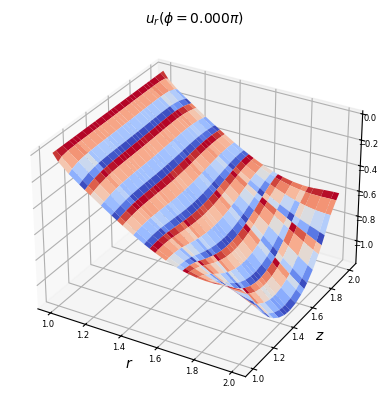

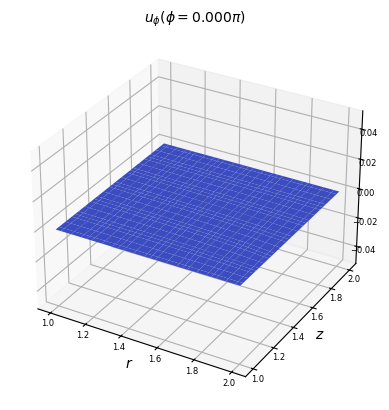

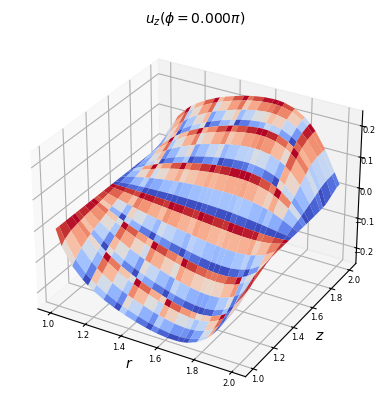

In [84]:
# Show displacement at a single angle
angle = np.pi * (0)
import Visualization
importlib.reload(Visualization)
Visualization.vis_Displacement_RZ_SurfacePlot(solid, angle)

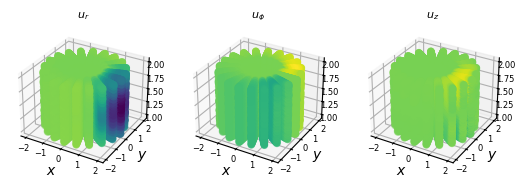

In [85]:
# Show displacement as a scatter plot
import Visualization
importlib.reload(Visualization)
Visualization.vis_Displacement_Scatter(solid)

In [86]:
# Stress
import Utility
importlib.reload(Utility)

Utility.cal_Stress_Fourier(solid)
Utility.cal_Stress_Physical(solid)
Utility.patch_Stress(solid)

import Utility
importlib.reload(Utility)

Utility.output_VTK(solid, 'Quad2SingleSpike')

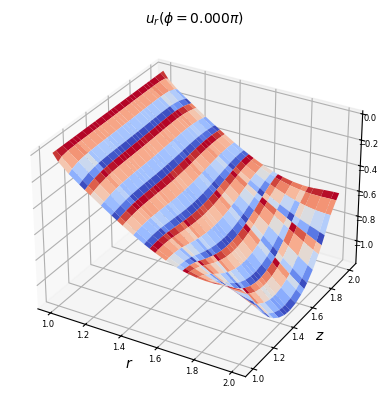

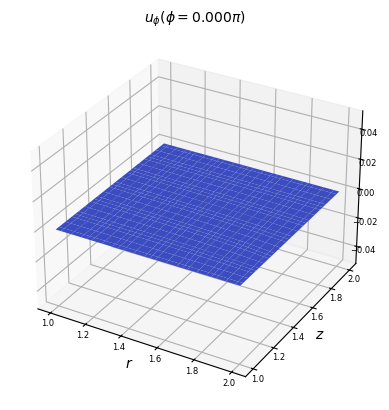

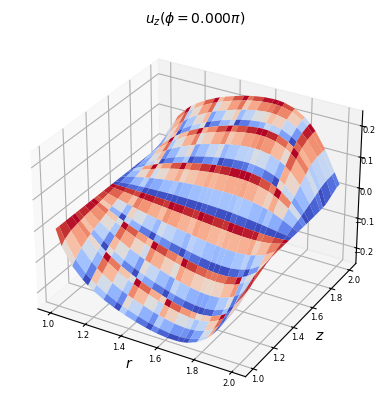

In [87]:
import Visualization
importlib.reload(Visualization)
phi = 0
Visualization.vis_Displacement_RZ_SurfacePlot(solid, phi)

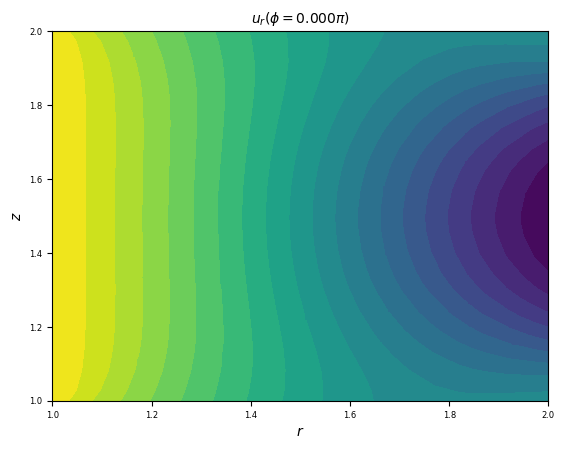

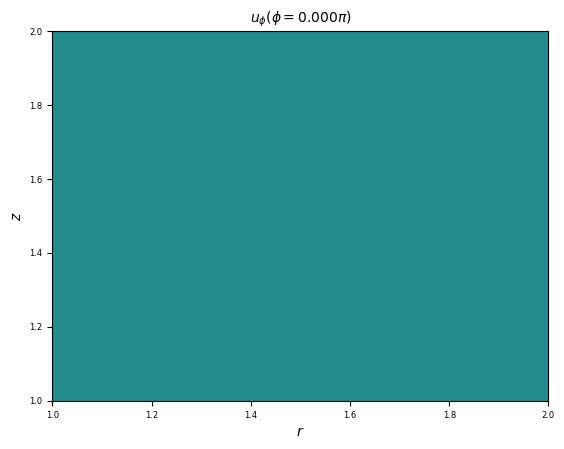

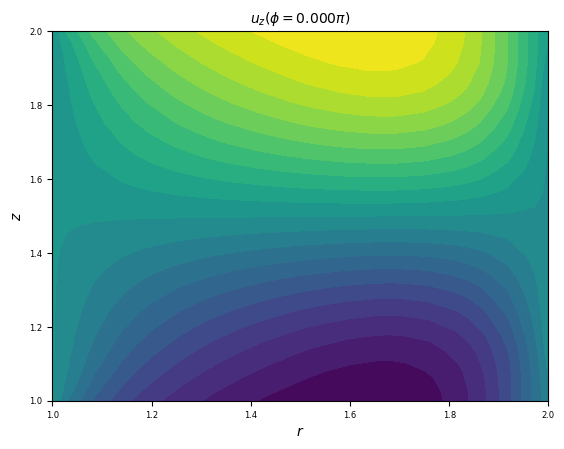

In [88]:
import Visualization
importlib.reload(Visualization)
phi = 0
Visualization.vis_Displacement_RZ_ContourPlot(solid, phi, num_level=20)

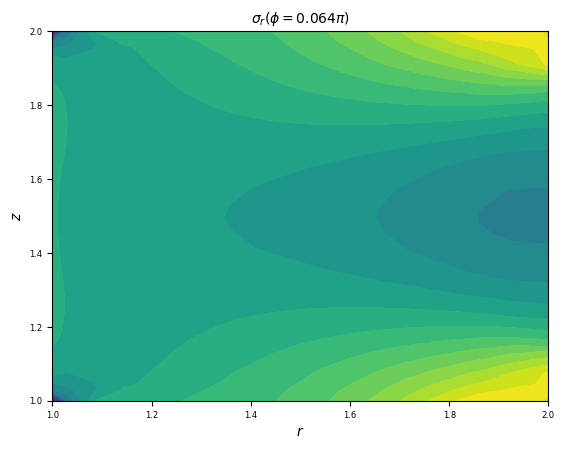

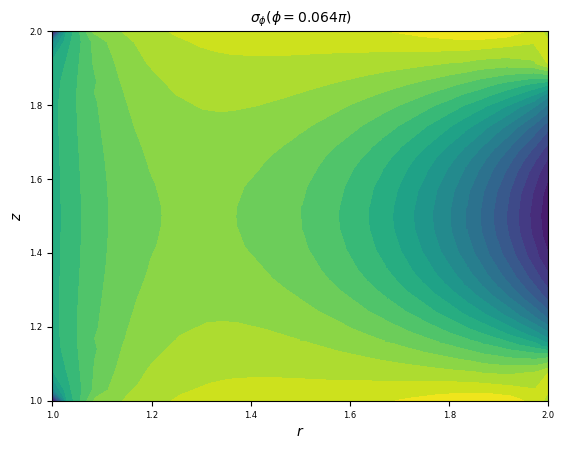

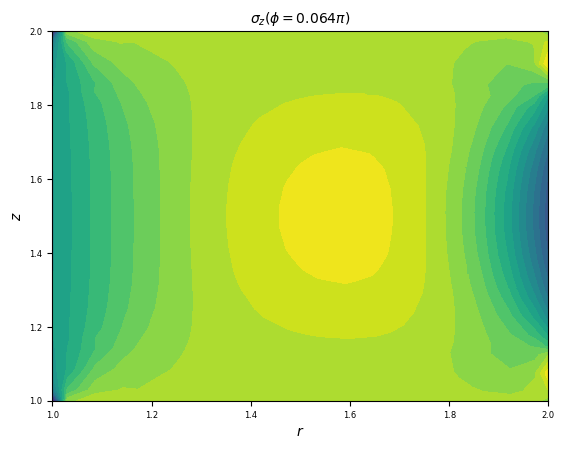

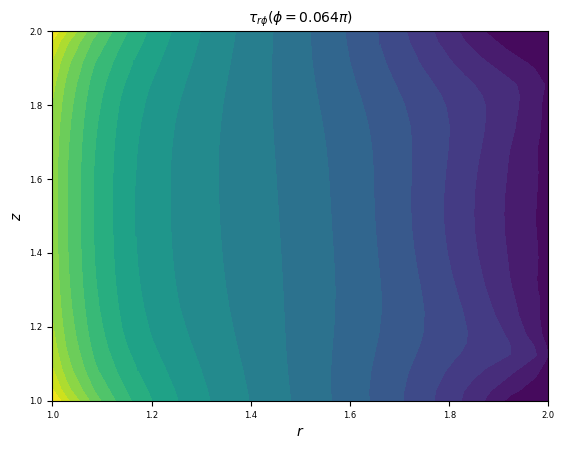

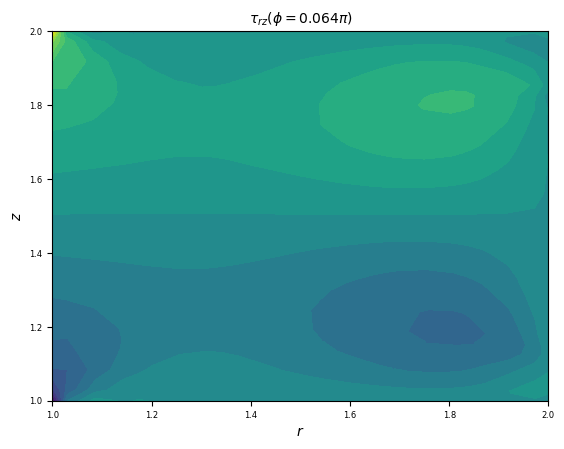

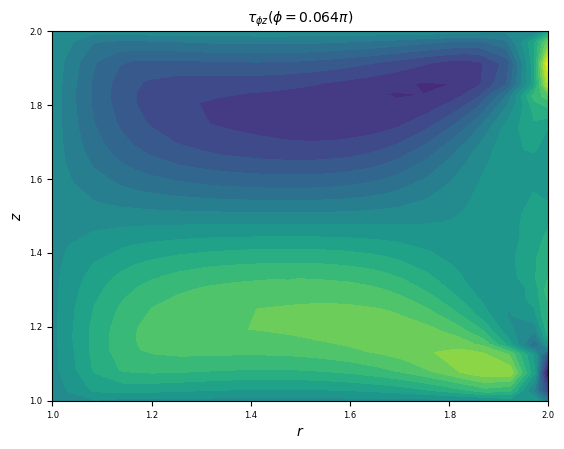

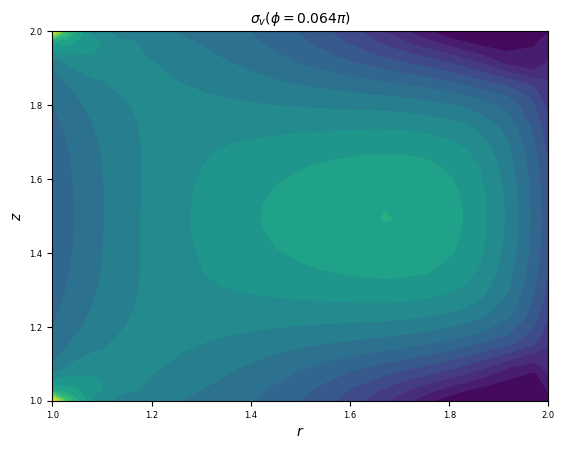

In [106]:
import Visualization
importlib.reload(Visualization)
phi = 0.2
Visualization.vis_Stress_RZ_ContourPlot(solid, phi, num_level=20)

In [144]:
import Mesh
importlib.reload(Mesh)
Mesh.cal_Quantity_Tetrahedron(solid, solid.name, 'abaqus3D.inp', solid.name+'.vtk')

# Grid
import SEM2D_Grid
importlib.reload(SEM2D_Grid)

import SEM2D_Element_Quad
importlib.reload(SEM2D_Element_Quad)

Nx, Ny = (4,4)
node_type_x, node_type_y = ('Legendre', 'Legendre')
grid = SEM2D_Grid.Grid(Nx, Ny, node_type_x, node_type_y)

corners = np.array([[0,0],[1,0],[1,1],[0,1]])
label_corners = [0,1,2,3]
e = SEM2D_Element_Quad.Element(0, corners, label_corners, grid)